In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
import sys
sys.path.append('../v1-DEBIAS-M-Analysis/General_functions/')
import plotting
def flatten(xss):
    return [x for xs in xss for x in xs]
order=['Baseline', 
         'combat', 
         'conqur', 
         'percnorm',
         'voom',
         'MMUPHin',
         'PLSDAbatch',
         'DEBIAS-M']



In [2]:

plotting.global_palette['Combat'] = plotting.global_palette['combat']
plotting.global_palette['ConQuR'] = plotting.global_palette['conqur']
plotting.global_palette['PLSDA'] = plotting.global_palette['plsda']
plotting.global_palette['DEBIAS-M'] = plotting.global_palette['debias-m']
plotting.global_palette['Baseline'] = plotting.global_palette['linear']
plotting.global_palette['MMUPHin'] = plotting.global_palette['mmuphin']
plotting.global_palette['Voom-SNM'] = plotting.global_palette['snm']
plotting.global_palette['True sample'] = 'whitesmoke'



In [3]:
order=['Baseline', 
         'Combat', 
         'ConQuR', 
         'percnorm',
         'Voom-SNM',
         'MMUPHin',
         'PLSDA',
         'DEBIAS-M', 
         'True sample'
      ]

In [4]:
def add_sig_ticks(res, 
                  ax, 
                  order,
                  pall=plotting.global_palette,
                  x_val='Group', 
                 hue_val=None):
        
    sig_df = pd.DataFrame( [ ( a,
                               wilcoxon(res.loc[
                                           (res['Group']=='DEBIAS-M')].auROC,
                                   res.loc[
                                           (res['Group']==a)].auROC, 
                                   alternative='two-sided',#'greater'
                                  ).pvalue < 0.05
                        )
                            for a in res.Group.unique() if a != 'DEBIAS-M'], 
                 columns=['Group','sig_v_debias']
                )
    
    sig_df['lower_y_val'] = min(res.auROC ) - 0.1
    sns.swarmplot(x=x_val, 
                  hue=hue_val,
                  y='lower_y_val',
                  data = sig_df.loc[sig_df.sig_v_debias], 
                  order = order,
#                   order=res['N per study'].unique(),
                  marker='+',
                  size=25/2, 
                  ax=ax,
                  palette=pall, 
                  dodge=True, 
                  color='black',
                  linewidth=3.5/2
                  )

    sns.swarmplot(x=x_val, 
                  hue=hue_val,
                  y='lower_y_val',
                  data = sig_df.loc[sig_df.sig_v_debias], 
                  order = order,
#                   order=res['N per study'].unique(),
                  marker='x',
                  size=17.5/2,
                  ax=ax,
                  palette=pall, 
                  dodge=True, 
                  color='black',
                  linewidth=3.5/2,
                  edgecolor="black"
                  )
    return(ax)

In [22]:
# qq=pd.read_csv('prediction-results-final.csv',index_col=0)

res=pd.read_csv('prediction-results-final-v3.csv', 
                index_col=0)

res.Group=res.Group.str.split('/').str[-1].str.rstrip('[.csv]')

# res['auROC'] = res.auROC.fillna(.5)

res['Group']=res.Group.str.replace('combat-out', 'Combat')\
                    .str.replace('conqur-out', 'ConQuR')\
                    .str.replace('PLSDAbatch_out','PLSDA')\
                    .str.replace('percnorm_out', 'percnorm')\
                    .str.replace('MMUPHin_out', 'MMUPHin')\
                    .str.replace('voom-snm-out', 'Voom-SNM')

qq=res.copy()



In [23]:
qq = qq.groupby([a for a in qq.columns if a != 'auROC'])['auROC'].median()

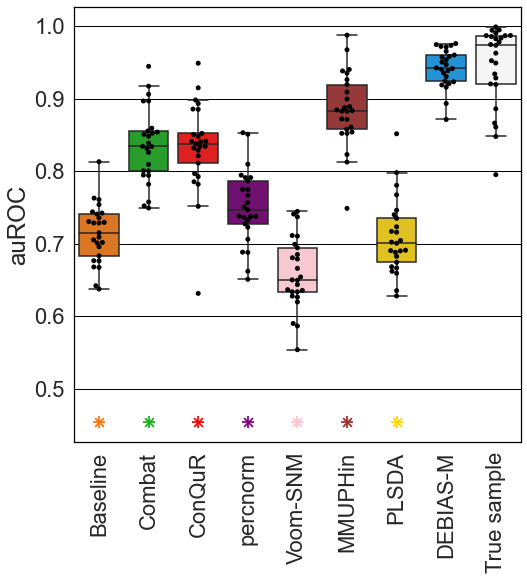

In [25]:
plt.figure(figsize=(8,8))
ax=sns.boxplot(x='Group', 
            y='auROC', 
            data = qq.reset_index(), 
            fliersize=0,
            order=order,
            palette=plotting.global_palette
           )

sns.swarmplot(x='Group', 
              y='auROC', 
              data = qq.reset_index(),
              color='black',
              s=5,
#               legend=False, 
              order=order, 
              ax=ax
            )

add_sig_ticks(qq.reset_index(), 
              ax, 
              order,
              )

plt.ylabel('auROC')
plt.xticks(rotation=90)
# plt.yticks(np.linspace(.2,1,5))
plt.xlabel(None)
plt.savefig('../results/All-methods-revision-simulations/prediction-auROC-plot.pdf', 
            format='pdf', 
            dpi=900, 
            bbox_inches='tight'
           )
plt.show()

In [5]:
def add_sig_ticks_jsd(res, 
                      ax, 
                      order,
                      pall=plotting.global_palette,
                      x_val='N_per_study', 
                      hue_val='Group'):
    
    sig_df = pd.DataFrame( flatten(  [ [ ( a,
                                       nbs,
                                       wilcoxon(res.loc[
                                                   (res[x_val]==nbs)&\
                                                   (res['Group']=='DEBIAS-M')].JSD,
                                           res.loc[(res[x_val]==nbs)&\
                                                   (res['Group']==a)].JSD, 
                                           alternative='less'
                                          ).pvalue < 0.1
                        )
                            for a in res.Group.unique() if a != 'DEBIAS-M']
                         for nbs in res[x_val].unique() ] ), 
                 columns=['Group', x_val, 'sig_v_debias']
                )
    
    sig_df['lower_y_val'] = max(res.JSD ) + 0.1
    
    if sig_df.sig_v_debias.sum()>0:
        sns.swarmplot(x=x_val, 
                      hue=hue_val,
                      y='lower_y_val',
                      data = sig_df.loc[sig_df.sig_v_debias], 
                      hue_order = order,
    #                   order=res['N per study'].unique(),
                      marker='+',
                      size=25/2, 
                      ax=ax,
                      palette=pall, 
                      dodge=True, 
                      color='black',
                      linewidth=3.5/2
                      )

        sns.swarmplot(x=x_val, 
                      hue=hue_val,
                      y='lower_y_val',
                      data = sig_df.loc[sig_df.sig_v_debias], 
                      hue_order = order,
    #                   order=res['N per study'].unique(),
                      marker='x',
                      size=17.5/2,
                      ax=ax,
                      palette=pall, 
                      dodge=True, 
                      color='black',
                      linewidth=3.5/2,
                      edgecolor="black"
                      )
    return(ax)

In [6]:
def process_for_jsd_plot(pth, 
                         x_val, 
                         orddd=None):
    
    res=pd.read_csv(pth, index_col=0)
#     res=res.loc[res.Pheno_noise>0]
#     res=res.loc[res.Pheno_noise<10]

    
    
    default_vals = pd.DataFrame({'N_studies':4.0, 
                                 'Pheno_noise':0.1, 
                                 'Read_depth':1e4, 
                                 'N_features':100.0, 
                                 'N_per_study':96.0,
                                 'Micro_noise':0.0
                                 }, 
                                index=[0]
                               )
    
#     if x_val!='Micro_noise':

    print(res.head())
    print(default_vals.head())

    res = res.merge(default_vals.drop(x_val, axis=1))
    
    print(res.shape)
    

    res = res.groupby( list( res.columns.drop('JSD').values) 
                               )['JSD'].median().reset_index()

    qq=res.groupby(
        list(  res.drop('JSD', axis=1).columns.values )
                )['JSD'].median().reset_index()

    qq['Group']=qq.Group.str.replace('combat-out.csv', 'Combat')\
                        .str.replace('conqur-out.csv', 'ConQuR')\
                        .str.replace('PLSDAbatch','PLSDA')


    order=['Baseline',
           'Combat',
           'ConQuR',
           'percnorm',
           'MMUPHin',
           'DEBIAS-M']
    
    if orddd is not None:
        qq=qq.loc[qq[x_val].isin(orddd)]

    plt.figure(figsize=(8,8))
    ax=sns.boxplot(y='JSD', 
                x=x_val,
                hue='Group', 
                data = qq.reset_index(), 
                fliersize=0,
                hue_order=order,
                palette=plotting.global_palette
               )

    sns.swarmplot(hue='Group', 
                  y='JSD', 
                  x=x_val,
                  data = qq.reset_index(),
                  color='black',
                  s=2.5,
    #               legend=False, 
                  hue_order=order, 
                  dodge=True, 
    #               ax=ax
                )

    add_sig_ticks_jsd(qq, 
                      ax, 
                      order,
                      pall=plotting.global_palette,
                      x_val=x_val,
                      hue_val='Group')

    plt.xticks(rotation=90)
    # plt.xlabel(None)
    plt.yticks(np.linspace(0,.8,5))
    plt.legend().remove()
    plt.ylabel('JSD')
    return(ax)

        Group       JSD  N_studies  N_per_study  N_features  Pheno_noise  \
288  Baseline  0.106498        4.0         96.0       100.0          0.1   
289  Baseline  0.184531        4.0         96.0       100.0          0.1   
290  Baseline  0.058639        4.0         96.0       100.0          0.1   
291  Baseline  0.046108        4.0         96.0       100.0          0.1   
292  Baseline  0.254918        4.0         96.0       100.0          0.1   

     Read_depth  BCF_std  Micro_noise  is_test_set  run_num  
288     10000.0      2.0          0.0         True      1.0  
289     10000.0      2.0          0.0         True      1.0  
290     10000.0      2.0          0.0         True      1.0  
291     10000.0      2.0          0.0         True      1.0  
292     10000.0      2.0          0.0         True      1.0  
   N_studies  Pheno_noise  Read_depth  N_features  N_per_study  Micro_noise
0        4.0          0.1     10000.0       100.0         96.0          0.0
(72000, 11)


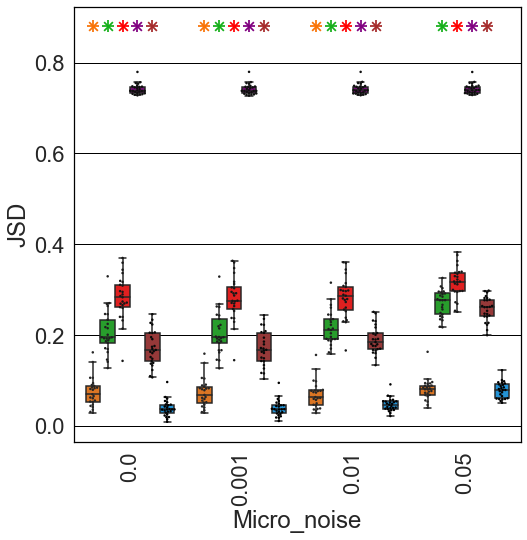

In [7]:
process_for_jsd_plot('all-micro-noise-simulation-results-final.csv', 
                    'Micro_noise', 
                     orddd=[0, 0.001, 0.01, 0.05]
                    )

plt.savefig('../results/All-methods-revision-simulations/JSD-with-all-methods-micro-noise.pdf',
            dpi=900, 
            format='pdf', 
            bbox_inches='tight'
            )

        Group       JSD  N_studies  N_per_study  N_features  Pheno_noise  \
288  Baseline  0.106204        4.0         96.0        10.0          0.1   
289  Baseline  0.062583        4.0         96.0        10.0          0.1   
290  Baseline  0.018411        4.0         96.0        10.0          0.1   
291  Baseline  0.178602        4.0         96.0        10.0          0.1   
292  Baseline  0.048042        4.0         96.0        10.0          0.1   

     Read_depth  BCF_std  Micro_noise  is_test_set  run_num  
288     10000.0      2.0          0.0         True      1.0  
289     10000.0      2.0          0.0         True      1.0  
290     10000.0      2.0          0.0         True      1.0  
291     10000.0      2.0          0.0         True      1.0  
292     10000.0      2.0          0.0         True      1.0  
   N_studies  Pheno_noise  Read_depth  N_features  N_per_study  Micro_noise
0        4.0          0.1     10000.0       100.0         96.0          0.0
(36000, 11)


/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


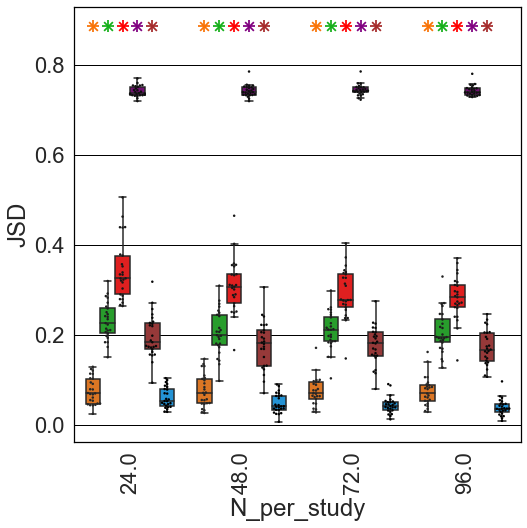

In [272]:
process_for_jsd_plot('all-S6-simulation-results-final.csv', 
                    'N_per_study')

plt.savefig('../results/All-methods-revision-simulations/JSD-with-all-methods-n-per-study.pdf',
            dpi=900, 
            format='pdf', 
            bbox_inches='tight'
            )

        Group       JSD  N_studies  N_per_study  N_features  Pheno_noise  \
288  Baseline  0.106204        4.0         96.0        10.0          0.1   
289  Baseline  0.062583        4.0         96.0        10.0          0.1   
290  Baseline  0.018411        4.0         96.0        10.0          0.1   
291  Baseline  0.178602        4.0         96.0        10.0          0.1   
292  Baseline  0.048042        4.0         96.0        10.0          0.1   

     Read_depth  BCF_std  Micro_noise  is_test_set  run_num  
288     10000.0      2.0          0.0         True      1.0  
289     10000.0      2.0          0.0         True      1.0  
290     10000.0      2.0          0.0         True      1.0  
291     10000.0      2.0          0.0         True      1.0  
292     10000.0      2.0          0.0         True      1.0  
   N_studies  Pheno_noise  Read_depth  N_features  N_per_study  Micro_noise
0        4.0          0.1     10000.0       100.0         96.0          0.0
(28800, 11)


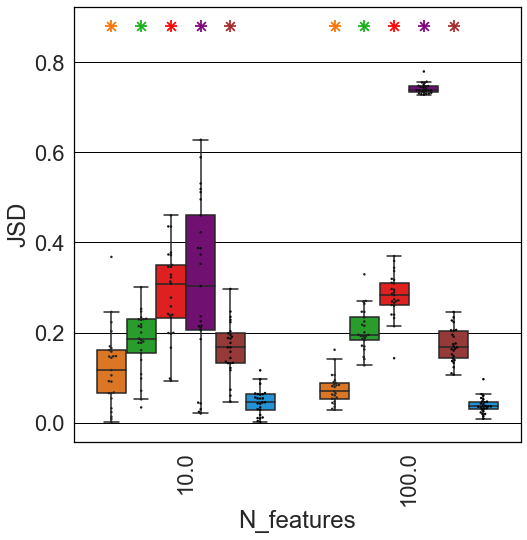

In [273]:
process_for_jsd_plot('all-S6-simulation-results-final.csv', 
                    'N_features')
plt.savefig('../results/All-methods-revision-simulations/JSD-with-all-methods-n-features.pdf',
            dpi=900, 
            format='pdf', 
            bbox_inches='tight'
            )

        Group       JSD  N_studies  N_per_study  N_features  Pheno_noise  \
288  Baseline  0.106204        4.0         96.0        10.0          0.1   
289  Baseline  0.062583        4.0         96.0        10.0          0.1   
290  Baseline  0.018411        4.0         96.0        10.0          0.1   
291  Baseline  0.178602        4.0         96.0        10.0          0.1   
292  Baseline  0.048042        4.0         96.0        10.0          0.1   

     Read_depth  BCF_std  Micro_noise  is_test_set  run_num  
288     10000.0      2.0          0.0         True      1.0  
289     10000.0      2.0          0.0         True      1.0  
290     10000.0      2.0          0.0         True      1.0  
291     10000.0      2.0          0.0         True      1.0  
292     10000.0      2.0          0.0         True      1.0  
   N_studies  Pheno_noise  Read_depth  N_features  N_per_study  Micro_noise
0        4.0          0.1     10000.0       100.0         96.0          0.0
(43200, 11)


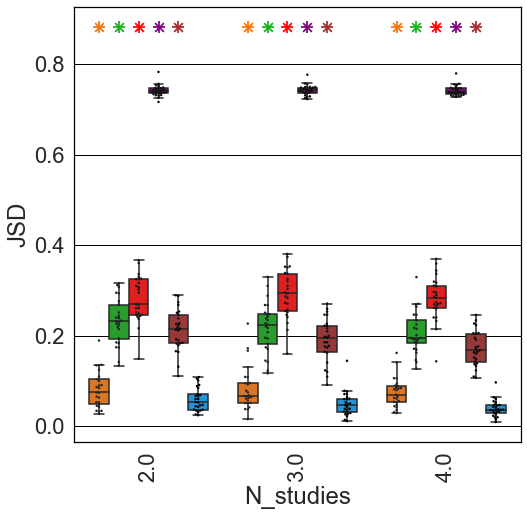

In [274]:
process_for_jsd_plot('all-S6-simulation-results-final.csv', 
                    'N_studies')
plt.savefig('../results/All-methods-revision-simulations/JSD-with-all-methods-n-studies.pdf',
            dpi=900, 
            format='pdf', 
            bbox_inches='tight'
            )

        Group       JSD  N_studies  N_per_study  N_features  Pheno_noise  \
288  Baseline  0.106204        4.0         96.0        10.0          0.1   
289  Baseline  0.062583        4.0         96.0        10.0          0.1   
290  Baseline  0.018411        4.0         96.0        10.0          0.1   
291  Baseline  0.178602        4.0         96.0        10.0          0.1   
292  Baseline  0.048042        4.0         96.0        10.0          0.1   

     Read_depth  BCF_std  Micro_noise  is_test_set  run_num  
288     10000.0      2.0          0.0         True      1.0  
289     10000.0      2.0          0.0         True      1.0  
290     10000.0      2.0          0.0         True      1.0  
291     10000.0      2.0          0.0         True      1.0  
292     10000.0      2.0          0.0         True      1.0  
   N_studies  Pheno_noise  Read_depth  N_features  N_per_study  Micro_noise
0        4.0          0.1     10000.0       100.0         96.0          0.0
(43200, 11)


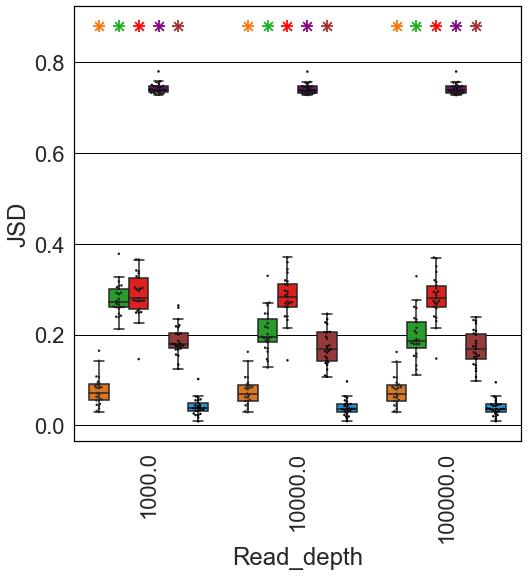

In [275]:

process_for_jsd_plot('all-S6-simulation-results-final.csv', 
                    'Read_depth')

plt.savefig('../results/All-methods-revision-simulations/JSD-with-all-methods-read_depth.pdf',
            dpi=900, 
            format='pdf', 
            bbox_inches='tight'
            )

        Group       JSD  N_studies  N_per_study  N_features  Pheno_noise  \
288  Baseline  0.106204        4.0         96.0        10.0          0.1   
289  Baseline  0.062583        4.0         96.0        10.0          0.1   
290  Baseline  0.018411        4.0         96.0        10.0          0.1   
291  Baseline  0.178602        4.0         96.0        10.0          0.1   
292  Baseline  0.048042        4.0         96.0        10.0          0.1   

     Read_depth  BCF_std  Micro_noise  is_test_set  run_num  
288     10000.0      2.0          0.0         True      1.0  
289     10000.0      2.0          0.0         True      1.0  
290     10000.0      2.0          0.0         True      1.0  
291     10000.0      2.0          0.0         True      1.0  
292     10000.0      2.0          0.0         True      1.0  
   N_studies  Pheno_noise  Read_depth  N_features  N_per_study  Micro_noise
0        4.0          0.1     10000.0       100.0         96.0          0.0
(43200, 11)


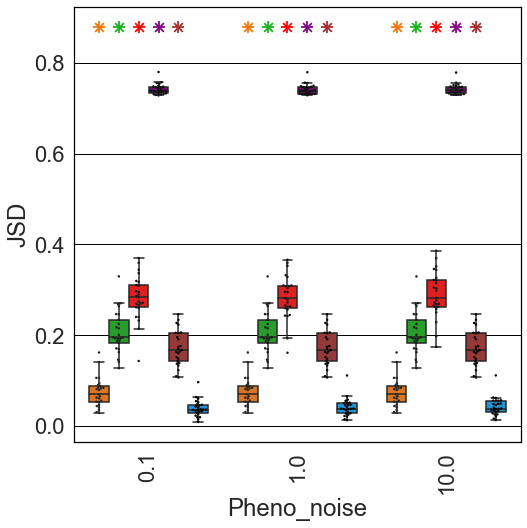

In [276]:
process_for_jsd_plot('all-S6-simulation-results-final.csv', 
                     'Pheno_noise')

plt.savefig('../results/All-methods-revision-simulations/JSD-with-all-methods-pheno_noise.pdf',
            dpi=900, 
            format='pdf', 
            bbox_inches='tight'
            )